In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.utils import to_categorical
%matplotlib inline


Using TensorFlow backend.


In [2]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)


train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

batch_size = 347
num_classes = 347
epochs =10


# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
le.fit(train_labels)
train_labels_enc =le.transform(train_labels)
train_labels_enc=to_categorical(train_labels_enc)
validation_labels_enc = le.transform(validation_labels)
validation_labels_enc =to_categorical(validation_labels_enc)
print(train_labels,train_labels_enc[2:100])



Train dataset shape: (346, 150, 150, 3) 	Validation dataset shape: (138, 150, 150, 3)
['Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahsan', 'Ahsan', 'Ahsan', 'Ahsan', 'Ahsan', 'Ahsan', 'Ahsan', 'Ahsan', 'Ahsan', 'Ahsan', 'Ahsan', 'Ahsan', 'Ahsan', 'Anus', 'Anus', 'Anus', 'Anus', 'Anus', 'Anus', 'Anus', 'Anus', 'Anus', 'Anus', 'Anus', 'Baber', 'Baber', 'Baber', 'Baber', 'Baber', 'Baber', 'Baber', 'Baber', 'Baber', 'Baber', 'Baber', 'Baber', 'Baber', 'Baber', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Bilal', 'Haider', 'Haider', 'Haider', 'Haider', 'Haider', 'Haider', 'Haider', 'Haider', 'Haider', 'Haider', 'Haider', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Hamna', 'Kamran', 'Kamran', 'Kamran', 'Kamran', 'Kamran', 'Kamran', 'Kamran', 'Kamran', 'Kamran', 'Kamran', 'Kamran', 'Kamran', 'Kamran', 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)           

KeyError: 'acc'

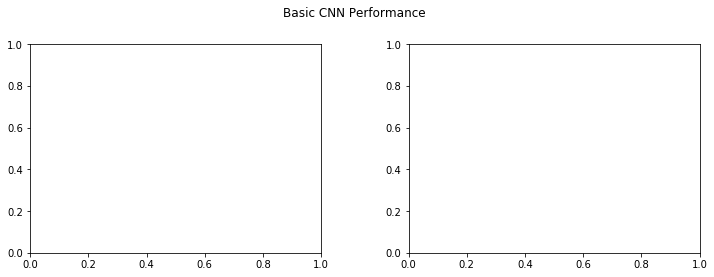

In [3]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
input_shape = (150, 150, 3)
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(24, activation='sigmoid'))


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              metrics=['accuracy'])
              


model.summary()



history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [4]:
model.save('university_data_basic.h5')